<a href="https://colab.research.google.com/github/mobarakol/CIFRA_LT/blob/main/cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CIFAR10:
Original CIFAR10 [0: airplane, 1: automobile, 2: bird, 3: cat, 4: deer, 5: dog, 6: frog, 7: horse, 8: ship, 9: truck] <br>


In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision
from torchvision import models
import torchvision.transforms as transforms
import os
import argparse
import copy
import random
import numpy as np
device = 'cuda' if torch.cuda.is_available() else 'cpu'
def seed_everything(seed=12):
    random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    np.random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
parser = argparse.ArgumentParser(description='BalancedLSF Training')
parser.add_argument('--lr', default=0.1, type=float, help='learning rate')
parser.add_argument('--lr_schedule', default=0, type=int, help='lr scheduler')
parser.add_argument('--batch_size', default=1024, type=int, help='batch size')
parser.add_argument('--test_batch_size', default=2048, type=int, help='batch size')
parser.add_argument('--num_epoch', default=50, type=int, help='epoch number')
parser.add_argument('--num_classes', type=int, default=10, help='number classes')
args = parser.parse_args(args=[])

def train(model, trainloader, criterion, optimizer):
    model.train()
    for batch_idx, (inputs, targets) in enumerate(trainloader):
        inputs, targets = inputs.to(device), targets.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

def test(model, testloader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for batch_idx, (inputs, targets) in enumerate(testloader):
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = model(inputs)
            _, predicted = outputs.max(1)
            total += targets.size(0)
            correct += predicted.eq(targets).sum().item()
    return correct / total

Training

In [2]:
seed_everything()
mean_cifar10, std_cifar10 = (0.5071, 0.4866, 0.4409), (0.2009, 0.1984, 0.2023)
transform_train = transforms.Compose([transforms.RandomCrop(32, padding=4),
            transforms.RandomHorizontalFlip(), transforms.ToTensor(),
            transforms.Normalize(mean_cifar10, std_cifar10), ])
transform_test = transforms.Compose([transforms.ToTensor(),
    transforms.Normalize(mean_cifar10, std_cifar10),])
train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform_train)
test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform_test)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=args.batch_size, shuffle=True,num_workers=4)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=2048, shuffle=False, num_workers=4)

model = models.resnet18().to(device)
model.fc = nn.Linear(model.fc.in_features, args.num_classes)
model = model.to(device)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


## This cell can be ignored if you wanna use the trained weights from next cell

In [2]:

optimizer = optim.SGD(model.parameters(), lr=args.lr, momentum=0.9, nesterov=False, weight_decay=0.0001)
criterion = nn.CrossEntropyLoss()

best_epoch, best_acc = 0.0, 0
for epoch in range(args.num_epoch):
    train(model, train_loader, criterion, optimizer)
    accuracy = test(model, test_loader)
    if accuracy > best_acc:
        patience = 0
        best_acc = accuracy
        best_epoch = epoch
        best_model = copy.deepcopy(model)
        torch.save(best_model.state_dict(), 'best_model_cifar10_lt.pth.tar')
    print('epoch: {}  acc: {:.4f}  best epoch: {}  best acc: {:.4f}'.format(
            epoch, accuracy, best_epoch, best_acc, optimizer.param_groups[0]['lr']))

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


epoch: 0  acc: 0.3396  best epoch: 0  best acc: 0.3396
epoch: 1  acc: 0.4535  best epoch: 1  best acc: 0.4535
epoch: 2  acc: 0.4862  best epoch: 2  best acc: 0.4862
epoch: 3  acc: 0.5457  best epoch: 3  best acc: 0.5457
epoch: 4  acc: 0.5827  best epoch: 4  best acc: 0.5827
epoch: 5  acc: 0.6101  best epoch: 5  best acc: 0.6101
epoch: 6  acc: 0.6508  best epoch: 6  best acc: 0.6508
epoch: 7  acc: 0.6524  best epoch: 7  best acc: 0.6524
epoch: 8  acc: 0.6677  best epoch: 8  best acc: 0.6677
epoch: 9  acc: 0.6693  best epoch: 9  best acc: 0.6693
epoch: 10  acc: 0.6973  best epoch: 10  best acc: 0.6973
epoch: 11  acc: 0.7084  best epoch: 11  best acc: 0.7084
epoch: 12  acc: 0.7154  best epoch: 12  best acc: 0.7154
epoch: 13  acc: 0.7101  best epoch: 12  best acc: 0.7154
epoch: 14  acc: 0.7298  best epoch: 14  best acc: 0.7298
epoch: 15  acc: 0.7326  best epoch: 15  best acc: 0.7326
epoch: 16  acc: 0.7393  best epoch: 16  best acc: 0.7393
epoch: 17  acc: 0.7389  best epoch: 16  best acc: 0

Download trained model

In [3]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

id = ['1rDyWMpo1RYa9wFx5gZsXf_mHMwCTr2oz']
downloaded = drive.CreateFile({'id':id[0]}) 
downloaded.GetContentFile('best_model_cifar10_lt.pth.tar')

## confusion matrix: scratch

In [12]:



def get_confusion_matrix(model, testloader):
    model.eval()
    confusion_matrix = torch.zeros(args.num_classes, args.num_classes)
    correct = 0
    total = 0
    acc_per_class = torch.zeros(args.num_classes)
    samples_per_class = torch.zeros(args.num_classes)
    with torch.no_grad():
        for i, (inputs, targets) in enumerate(testloader):
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            for t, p in zip(targets.view(-1), preds.view(-1)):
                    confusion_matrix[t.long(), p.long()] += 1
            
            total += targets.size(0)
            correct_matrix = preds.eq(targets)
            correct += correct_matrix.sum().item()
            for cls in range (args.num_classes):
                acc_per_class[cls] += correct_matrix[targets==cls].sum().item()
                samples_per_class[cls] += (targets==cls).sum().item()

    return correct / total, confusion_matrix, acc_per_class/samples_per_class

def get_tp_tn_fp_fn(conf_matrix, nb_classes):
    TP = conf_matrix.diag()
    for c in range(nb_classes):
        idx = torch.ones(nb_classes).byte()
        idx[c] = 0
        # all non-class samples classified as non-class
        TN = conf_matrix[idx.nonzero()[:, None], idx.nonzero()].sum() #conf_matrix[idx[:, None], idx].sum() - conf_matrix[idx, c].sum()
        # all non-class samples classified as class
        FP = conf_matrix[idx, c].sum()
        # all class samples not classified as class
        FN = conf_matrix[c, idx].sum()
        
        print('Class {}\nTP {}, TN {}, FP {}, FN {}, acc={}, recall={}, prec={}, total= {}'.format(
            c, TP[c], TN, FP, FN,(TP[c]+TN)/(TP[c]+TN+FP+FN), TP[c]/(TP[c]+FN), TP[c]/(TP[c]+FP), (TP[c]+TN+FP+FN) ))
    

model.load_state_dict(torch.load('best_model_cifar10_lt.pth.tar'))
acc, confusion_matrix, acc_per_class = get_confusion_matrix(model, test_loader)
print('confusion matrix:\n', confusion_matrix)
class_wise_acc = confusion_matrix.diag()/confusion_matrix.sum(1)
print('per-class accuracy from CM:', class_wise_acc)
print('per-class accuracy from scratch:', acc_per_class)
print('accuracy-with CM:',class_wise_acc.mean(), ',directly:',acc)

get_tp_tn_fp_fn(confusion_matrix, args.num_classes)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


confusion matrix:
 tensor([[855.,   6.,  44.,  11.,   9.,   3.,   6.,   4.,  43.,  19.],
        [ 22., 905.,   7.,   5.,   1.,   1.,   3.,   0.,  16.,  40.],
        [ 28.,   1., 841.,  24.,  43.,  13.,  29.,   9.,   6.,   6.],
        [ 20.,   3., 109., 666.,  33.,  65.,  49.,  28.,  10.,  17.],
        [ 12.,   1.,  62.,  60., 752.,   8.,  45.,  53.,   5.,   2.],
        [ 12.,   0.,  96., 203.,  33., 579.,  19.,  46.,   7.,   5.],
        [  4.,   4.,  41.,  50.,  15.,   8., 870.,   3.,   3.,   2.],
        [ 15.,   1.,  44.,  44.,  20.,  10.,   1., 848.,   6.,  11.],
        [ 43.,  12.,   8.,   8.,   3.,   1.,   5.,   2., 908.,  10.],
        [ 39.,  48.,   7.,   5.,   0.,   2.,   5.,   2.,  20., 872.]])
per-class accuracy from CM: tensor([0.8550, 0.9050, 0.8410, 0.6660, 0.7520, 0.5790, 0.8700, 0.8480, 0.9080,
        0.8720])
per-class accuracy from scratch: tensor([0.8550, 0.9050, 0.8410, 0.6660, 0.7520, 0.5790, 0.8700, 0.8480, 0.9080,
        0.8720])
accuracy-with CM: tensor(

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead. (Triggered internally at  ../aten/src/ATen/native/IndexingUtils.h:30.)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead. (Triggered internally at  ../aten/src/ATen/native/IndexingUtils.h:30.)


## confusion matrix: lib

In [13]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

from sklearn.metrics import confusion_matrix
#from resources.plotcm import plot_confusion_matrix

def evaluation_all(model, testloader):
    model.eval()
    pred_list = []
    labels_list = []
    correct = 0
    total = 0
    with torch.no_grad():
        for batch_idx, (inputs, targets) in enumerate(testloader):
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = model(inputs)
            _, predicted = outputs.max(1)
            total += targets.size(0)
            correct += predicted.eq(targets).sum().item()
            outputs = F.softmax(outputs, dim=1)
            pred_list.append(predicted)
            labels_list.append(targets)

        preds = torch.cat(pred_list).cpu().numpy()
        labels = torch.cat(labels_list).cpu().numpy()
    return correct / total, preds, labels

acc, preds, labels = evaluation_all(model, test_loader)
acc_lib = accuracy_score(labels, preds)
# Confusion matrix
conf_mat=confusion_matrix(labels, preds)
print('confusion matrix:\n',conf_mat)

# Per-class accuracy
class_accuracy=conf_mat.diagonal()/conf_mat.sum(1)
print('per-class accuracy:',class_accuracy)
print('accuracy-with CM:',class_accuracy.mean(), ',directly:',acc, 'lib:',acc_lib)


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


confusion matrix:
 [[855   6  44  11   9   3   6   4  43  19]
 [ 22 905   7   5   1   1   3   0  16  40]
 [ 28   1 841  24  43  13  29   9   6   6]
 [ 20   3 109 666  33  65  49  28  10  17]
 [ 12   1  62  60 752   8  45  53   5   2]
 [ 12   0  96 203  33 579  19  46   7   5]
 [  4   4  41  50  15   8 870   3   3   2]
 [ 15   1  44  44  20  10   1 848   6  11]
 [ 43  12   8   8   3   1   5   2 908  10]
 [ 39  48   7   5   0   2   5   2  20 872]]
per-class accuracy: [0.855 0.905 0.841 0.666 0.752 0.579 0.87  0.848 0.908 0.872]
accuracy-with CM: 0.8096000000000002 ,directly: 0.8096 lib: 0.8096


## Drawing confusion matrix

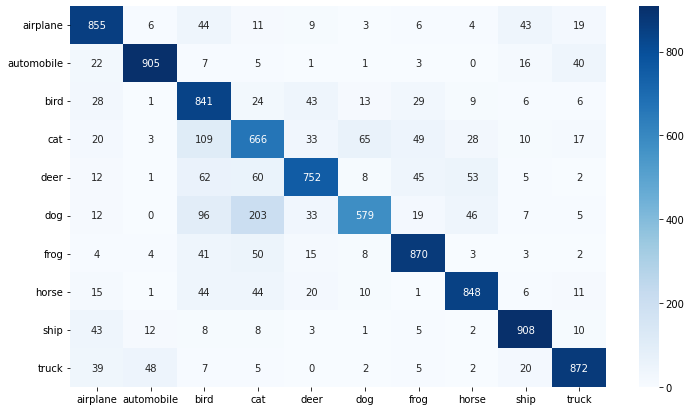

In [34]:
import seaborn as sn
import pandas as pd
classes = ('airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
df_cm = pd.DataFrame(conf_mat, index = [i for i in classes],
                     columns = [i for i in classes])
plt.figure(figsize = (12,7))
sn.heatmap(df_cm, annot=True, cmap='Blues', fmt='g')

In [44]:
def confusion(prediction, truth):
    """ Returns the confusion matrix for the values in the `prediction` and `truth`
    tensors, i.e. the amount of positions where the values of `prediction`
    and `truth` are
    - 1 and 1 (True Positive)
    - 1 and 0 (False Positive)
    - 0 and 0 (True Negative)
    - 0 and 1 (False Negative)
    """

    confusion_vector = prediction / truth
    # Element-wise division of the 2 tensors returns a new tensor which holds a
    # unique value for each case:
    #   1     where prediction and truth are 1 (True Positive)
    #   inf   where prediction is 1 and truth is 0 (False Positive)
    #   nan   where prediction and truth are 0 (True Negative)
    #   0     where prediction is 0 and truth is 1 (False Negative)

    true_positives = torch.sum(confusion_vector == 1).item()
    false_positives = torch.sum(confusion_vector == float('inf')).item()
    true_negatives = torch.sum(torch.isnan(confusion_vector)).item()
    false_negatives = torch.sum(confusion_vector == 0).item()

    return true_positives, false_positives, true_negatives, false_negatives

TP, FP, TN, FN = confusion(torch.tensor(labels), torch.tensor(preds))
print('overall:',TP, TN, FP, FN)
print('accuracy:', (TP+TN)/(TP+TN+FP+FN))

overall: 7241 855 195 145
accuracy: 0.959696538643907


In [45]:
(TP+TN+FP+FN)

8436

In [43]:
labels.shape

(10000,)